In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
batchsize=135
latent_dim = 20        # Size of the latent space
sequence_length =60

df_original1 = pd.read_csv('/content/normalized_device15.csv')
zx=len(df_original1)
tmp=zx%batchsize
df_original=df_original1.iloc[:-tmp,:]
zx1=len(df_original)

In [ ]:
print(zx1)

82080


In [ ]:
df_original.tail(15)

,timestamp_device,device_id,p_avg,p_min,p_max,y,mov_ten_avg,mov_ten_min,mov_ten_max
82065,2022-10-24 07:47:00+00:00,dev-5t2uzv34fzcn,1193.690865,1128.53160,1269.59805,0.0,2081.554448,1646.446995,3286.848285
82066,2022-10-24 07:48:00+00:00,dev-5t2uzv34fzcn,1220.560665,1128.53160,1471.12155,0.0,2087.990676,1646.446995,3313.046340
82067,2022-10-24 07:49:00+00:00,dev-5t2uzv34fzcn,1178.576603,1128.53160,1229.29335,0.0,1987.732735,1646.446995,3143.766600
82068,2022-10-24 07:50:00+00:00,dev-5t2uzv34fzcn,1183.614690,1128.53160,1249.44570,0.0,1810.224119,1519.487190,2349.764010
82069,2022-10-24 07:51:00+00:00,dev-5t2uzv34fzcn,1180.107953,1128.53160,1229.29335,0.0,1577.180977,1301.841810,2025.311175
82070,2022-10-24 07:52:00+00:00,dev-5t2uzv34fzcn,1173.874388,1108.37925,1229.29335,0.0,1467.014797,1297.811340,1710.934515
82071,2022-10-24 07:53:00+00:00,dev-5t2uzv34fzcn,1178.912475,1108.37925,1249.44570,0.0,1445.048736,1293.780870,1569.868065
82072,2022-10-24 07:54:00+00:00,dev-5t2uzv34fzcn,1176.897240,1128.53160,1309.90275,0.0,1316.409568,1166.821065,1442.908260
82073,2022-10-24 07:55:00+00:00,dev-5t2uzv34fzcn,1195.034355,1128.53160,1450.96920,0.0,1217.926058,1122.485895,1336.100805
82074,2022-10-24 07:56:00+00:00,dev-5t2uzv34fzcn,1201.751805,1128.53160,1450.96920,0.0,1188.302104,1124.501130,1313.933220


In [ ]:
series1=df_original['mov_ten_avg'].values
seriesy=df_original['y'].values
q1=np.quantile(series1,0.15)
q3=np.quantile(series1,0.85)
iqr=q3-q1
upper_bound = q3 + 1.5 * iqr
series1[series1 > upper_bound] = upper_bound

scaler = StandardScaler()
series = scaler.fit_transform(series1.reshape(-1, 1))
series

array([[-0.97715438],
       [-0.97605574],
       [-0.98154895],
       ...,
       [-1.22041782],
       [-1.22320105],
       [-1.22632938]])

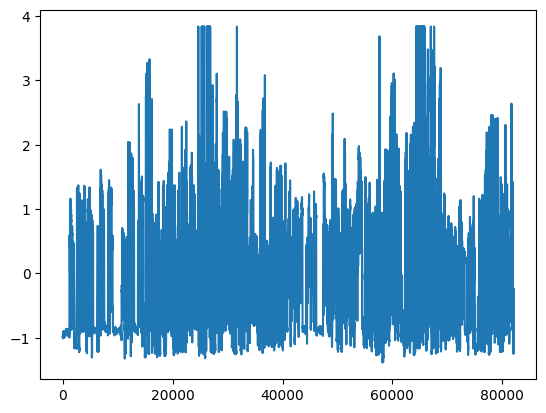

In [ ]:
plt.plot(np.arange(len(series)),series)
plt.show()

In [ ]:
len(series)

82080

In [ ]:
def show_sample(ds):
  samples=ds.take(1)
  for item in samples:
    print(item)

In [ ]:
ds=tf.data.Dataset.from_tensor_slices(series)
ds=ds.window(sequence_length,5,drop_remainder=True)
ds=ds.flat_map(lambda window: window.batch(sequence_length ))# change the type of samples in data set

# ds = ds.map(lambda window: (tf.reshape(window, (sequence_length,-1)),
#                             tf.reshape(window, (sequence_length,-1)))).batch(batchsize)
ds = ds.map(lambda window: tf.reshape(window, (sequence_length,-1))).batch(batchsize)

In [ ]:
show_sample(ds)


tf.Tensor(
[[[-0.97715438]
  [-0.97605574]
  [-0.98154895]
  ...
  [-0.91644295]
  [-0.9177247 ]
  [-0.91843727]]

 [[-0.9749571 ]
  [-0.98704215]
  [-0.98704215]
  ...
  [-0.92444442]
  [-0.92653183]
  [-0.9278502 ]]

 [[-0.98109087]
  [-0.98116411]
  [-0.98196978]
  ...
  [-0.92669135]
  [-0.92453069]
  [-0.9229988 ]]

 ...

 [[-0.89928863]
  [-0.90822425]
  [-0.91637157]
  ...
  [-0.89359369]
  [-0.89315424]
  [-0.89201897]]

 [[-0.94344347]
  [-0.94329698]
  [-0.94351671]
  ...
  [-0.8931021 ]
  [-0.89229643]
  [-0.89200346]]

 [[-0.93963981]
  [-0.93942008]
  [-0.93903649]
  ...
  [-0.89019163]
  [-0.88853311]
  [-0.88805704]]], shape=(135, 60, 1), dtype=float64)


In [ ]:
samples=ds.take(1)
for a in samples:
    item=a
    break


In [ ]:
def add_gaussian_noise(x, stddev=0.1):
    return x + tf.random.normal(shape=tf.shape(x), mean=0.0, stddev=stddev, dtype=x.dtype)

In [ ]:
def sampling(args, epsilon_std=1.):
        z_mean, z_log_sigma = args
        batch = tf.shape(z_mean)[0]  # Dynamically infer batch size
        dim = tf.shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim),  # Use inferred batch size
                              mean=0., stddev=epsilon_std)
        # epsilon = K.random_normal(shape=(batchsize, latent_dim),
        #                           mean=0., stddev=epsilon_std)
        return layers.Add()([z_mean, layers.Multiply()([z_log_sigma, epsilon])])

In [ ]:


encoder_input = layers.Input(shape=( sequence_length,1))  # Input shape should be (sequence_length, 1)
x = layers.LSTM(64, return_sequences=True)(encoder_input)
##############################
att_out = layers.MultiHeadAttention(num_heads=1, key_dim=64)(x, x)
att_out = layers.Add()([x, att_out])
x = layers.LayerNormalization()(att_out)
####################################################
x = layers.LSTM(32, return_sequences=False)(x)  # Changed to return_sequences=False for the final LSTM layer
z_mean = layers.Dense(latent_dim, activation='relu')(x)
z_log_sigma = layers.Dense(latent_dim, activation='relu')(x)
encoder = models.Model(encoder_input, [z_mean, z_log_sigma], name="encoder")
# Sampling layer
# z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

# Decoder
decoder_input = layers.Input(shape=(latent_dim,))
x = layers.RepeatVector(sequence_length)(decoder_input)
x = layers.LSTM(32, return_sequences=True, activation='relu')(x)
#########################################
att_out1 = layers.MultiHeadAttention(num_heads=1, key_dim=32)(x, x)
att_out1 = layers.Add()([x, att_out1])
x = layers.LayerNormalization()(att_out1)
###########################################
x = layers.LSTM(64, return_sequences=True, activation='relu')(x)
# decoder_output = layers.LSTM(1, return_sequences=True)(x)
decoder_output = layers.TimeDistributed(layers.Dense(1))(x)
decoder = models.Model(decoder_input, decoder_output, name="decoder")

# # VAE model
# encoder_output = decoder(z)
# autoencoder = models.Model(encoder_input, encoder_output, name="autoencoder")
# autoencoder.summary()

# VAE loss
def vae_loss(x, x_reconstructed, z_mean, z_log_sigma):
    try:

      # reconstruction_loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(x, x_reconstructed))
      reconstruction_loss = tf.reduce_mean(tf.keras.losses.logcosh(x, x_reconstructed))
      kl_loss = 1 + z_log_sigma - tf.square(z_mean) - tf.exp(z_log_sigma)
      kl_loss = tf.reduce_sum(kl_loss, axis=-1)
      kl_loss *= -0.5
      return reconstruction_loss + tf.reduce_mean(kl_loss)
    except Exception as e:
        print("error in vaeloss:", e)



class VAEModel(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAEModel, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_sigma = self.encoder(inputs)
        z = layers.Lambda(sampling)([z_mean, z_log_sigma])
        reconstructed = self.decoder(z)
        return reconstructed

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_sigma = self.encoder(data)
            # z = Sampling()([z_mean, z_log_sigma])
            z = layers.Lambda(sampling)([z_mean, z_log_sigma])
            reconstructed = self.decoder(z)
            loss = vae_loss(data, reconstructed, z_mean, z_log_sigma)
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        return {"loss": loss}

# Instantiate and compile the VAE model
vae = VAEModel(encoder=encoder, decoder=decoder)
# vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
vae.compile(optimizer='rmsprop')
vae.build(( sequence_length,1)) # `input_shape` is the shape of the input data
vae.summary()



Model: "vae_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Functional)        [(None, 20),              47400     
                              (None, 20)]                        
                                                                 
 decoder (Functional)        (None, 60, 1)             35969     
                                                                 
Total params: 83369 (325.66 KB)
Trainable params: 83369 (325.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
vae.fit(ds,epochs=20)

Epoch 1/20
122/122 [==============================] - 58s 416ms/step - loss: 0.2777
Epoch 2/20
122/122 [==============================] - 47s 389ms/step - loss: 0.1893
Epoch 3/20
122/122 [==============================] - 49s 404ms/step - loss: 0.1795
Epoch 4/20
122/122 [==============================] - 45s 372ms/step - loss: 0.1799
Epoch 5/20
122/122 [==============================] - 49s 400ms/step - loss: 0.1591
Epoch 6/20
122/122 [==============================] - 49s 404ms/step - loss: 0.1592
Epoch 7/20
122/122 [==============================] - 47s 379ms/step - loss: 0.1504
Epoch 8/20
122/122 [==============================] - 46s 374ms/step - loss: 0.1544
Epoch 9/20
122/122 [==============================] - 47s 385ms/step - loss: 0.1399
Epoch 10/20
122/122 [==============================] - 48s 390ms/step - loss: 0.1311
Epoch 11/20
122/122 [==============================] - 47s 382ms/step - loss: 0.1245
Epoch 12/20
122/122 [==============================] - 48s 391ms/step - lo

In [ ]:

j=0
latentmean=[]
latentsigma=[]
for batch in ds:
        inputs = batch
        if j==0:
          a,b = encoder.predict(inputs)
          latentmean=a
          latentsigma=b
          j+=1
        else:
          a,b = encoder.predict(inputs)
          latentmean = tf.concat([latentmean, a], axis=0)
          latentsigma = tf.concat([latentsigma, b], axis=0)




3/3 [==============================] - 0s 18ms/step


In [ ]:
print(inputs.shape)
# print(labels.shape)
print(latentmean.shape)
print(latentsigma.shape)


(70, 60, 1)
(16405, 20)
(16405, 20)


In [ ]:
print(latentmean[0:2,:])

tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.05360791 0.         0.08976636 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.05391286 0.         0.0885755  0.         0.
  0.         0.        ]], shape=(2, 20), dtype=float32)


In [ ]:
numpy_array = tf.squeeze(latentmean).numpy()

# Convert numpy array to pandas DataFrame
df = pd.DataFrame(numpy_array)

# Save DataFrame to CSV file using pandas
df.to_csv('latent.csv', index=False, header=False)

In [ ]:
from google.colab import files
files.download('latent.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
numpy_array = tf.squeeze(latentsigma).numpy()

# Convert numpy array to pandas DataFrame
df = pd.DataFrame(numpy_array)

# Save DataFrame to CSV file using pandas
df.to_csv('sigma.csv', index=False, header=False)
from google.colab import files
files.download('sigma.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Sample time series data
time_series_data = series  # A simple range of 100 data points
time_series_y=seriesy
ds1=tf.data.Dataset.from_tensor_slices(time_series_data)
ds1=ds1.window(sequence_length,1,drop_remainder=True)
ds1=ds1.flat_map(lambda window: window.batch(sequence_length ))# change the type of samples in data set

# ds = ds.map(lambda window: (tf.reshape(window, (sequence_length,-1)),
#                             tf.reshape(window, (sequence_length,-1)))).batch(batchsize)
ds1 = ds1.map(lambda window: tf.reshape(window, (sequence_length,-1))).batch(batchsize)

In [ ]:
j=0
latentmean1=[]
latentsigma1=[]
for sample in ds1:
        if j==0:
          a,b = encoder.predict(sample)
          latentmean1=a
          latentsigma1=b
          j+=1
        else:
          a,b = encoder.predict(sample)
          latentmean1 = tf.concat([latentmean1, a], axis=0)
          latentsigma1 = tf.concat([latentsigma1, b], axis=0)

3/3 [==============================] - 0s 21ms/step


In [ ]:


# Convert to DataFrame
df1 = pd.DataFrame(latentmean1)
df2 = pd.DataFrame(seriesy[sequence_length-1:])

# Ensure both DataFrames have the same number of rows
assert df1.shape[0] == df2.shape[0], "Number of rows must match"

# Concatenate DataFrames
concatenated_df = pd.concat([df1, df2], axis=1)
print(concatenated_df.shape)

# Save DataFrame to CSV file using pandas
concatenated_df.to_csv('latentmean1.csv', index=False, header=False)
from google.colab import files
files.download('latentmean1.csv')

(82021, 21)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Convert to DataFrame
df1 = pd.DataFrame(latentsigma1)
df2 = pd.DataFrame(seriesy[sequence_length-1:])

# Ensure both DataFrames have the same number of rows
assert df1.shape[0] == df2.shape[0], "Number of rows must match"

# Concatenate DataFrames
concatenated_df = pd.concat([df1, df2], axis=1)
print(concatenated_df.shape)

# Save DataFrame to CSV file using pandas
concatenated_df.to_csv('latentsigma1.csv', index=False, header=False)
from google.colab import files
files.download('latentsigma1.csv')

(82021, 21)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>